In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
from sklearn.model_selection import train_test_split


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX

from pmdarima import auto_arima

from arch import arch_model



In [69]:
##import machine learning models

# Importing Linear Regression
from sklearn.linear_model import LinearRegression

# Importing Logistic Regression
from sklearn.linear_model import LogisticRegression

# Importing Decision Tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Importing Random Forest
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


In [70]:
daatasources={
    source.replace(".zip",""):source 
    for source in os.listdir("/Users/eduardomartinezacha/Desktop/coding/python/final material/project") 
    if source.endswith(".zip")}
daatasources


{'de-shareprices-daily': 'de-shareprices-daily.zip'}

In [71]:
datasets={}

for key, values in daatasources.items():
    datasets[key]= pd.read_csv(f"/Users/eduardomartinezacha/Desktop/coding/python/final material/project/{values}",sep=';')

In [72]:
import pandas as pd

datasets = {}

for key, values in daatasources.items():
    datasets[key] = pd.read_csv(f"/Users/eduardomartinezacha/Desktop/coding/python/final material/project/{values}", sep=';')

# Combine all DataFrames into one
df = pd.concat(datasets.values(), ignore_index=True)

df['Price_Changes']= df['Open']- df['Close']
df['Price_Changes']

0        0.58
1        1.04
2       -0.43
3       -1.73
4       -1.92
         ... 
39091   -2.88
39092    2.82
39093    2.33
39094    0.00
39095   -0.27
Name: Price_Changes, Length: 39096, dtype: float64

In [73]:
df=pd.DataFrame(df)

In [74]:
vals=['VOW.DE','MBG.DE','BMW.DE','BAYN.DE','FRE.DE']
df=df[df['Ticker'].isin(vals)]
df['Date']=pd.to_datetime(df['Date'])


In [76]:
df['Ticker'].unique()

array(['BAYN.DE', 'BMW.DE', 'FRE.DE', 'MBG.DE', 'VOW.DE'], dtype=object)

In [77]:
automobile_vals=['VOW.DE','MBG.DE','BMW.DE']
auto=df[df['Ticker'].isin(automobile_vals)]
portfolio_auto= auto.groupby('Date').agg({'Close':'sum'})
portfolio_auto['log_returns']=np.log( portfolio_auto['Close']/portfolio_auto['Close'].shift(1))*100

pharma_vals=['BAYN.DE','FRE.DE']
pharma= df[df['Ticker'].isin(pharma_vals)]
portfolio_pharm= pharma.groupby('Date').agg({'Close':'sum'})
portfolio_pharm['log_returns']=np.log( portfolio_pharm['Close']/portfolio_pharm['Close'].shift(1))*100



In [78]:
portfolio_auto= portfolio_auto[portfolio_auto['log_returns'].notnull()]
portfolio_pharm= portfolio_pharm[portfolio_pharm['log_returns'].notnull()]


In [79]:
bmw=df[df['Ticker']=='BMW.DE']
BAYN=df[df['Ticker']=='BAYN.DE']
FRE=df[df['Ticker']=='FRE.DE']
mbg=df[df['Ticker']=='MBG.DE']
vow=df[df['Ticker']=='VOW.DE']


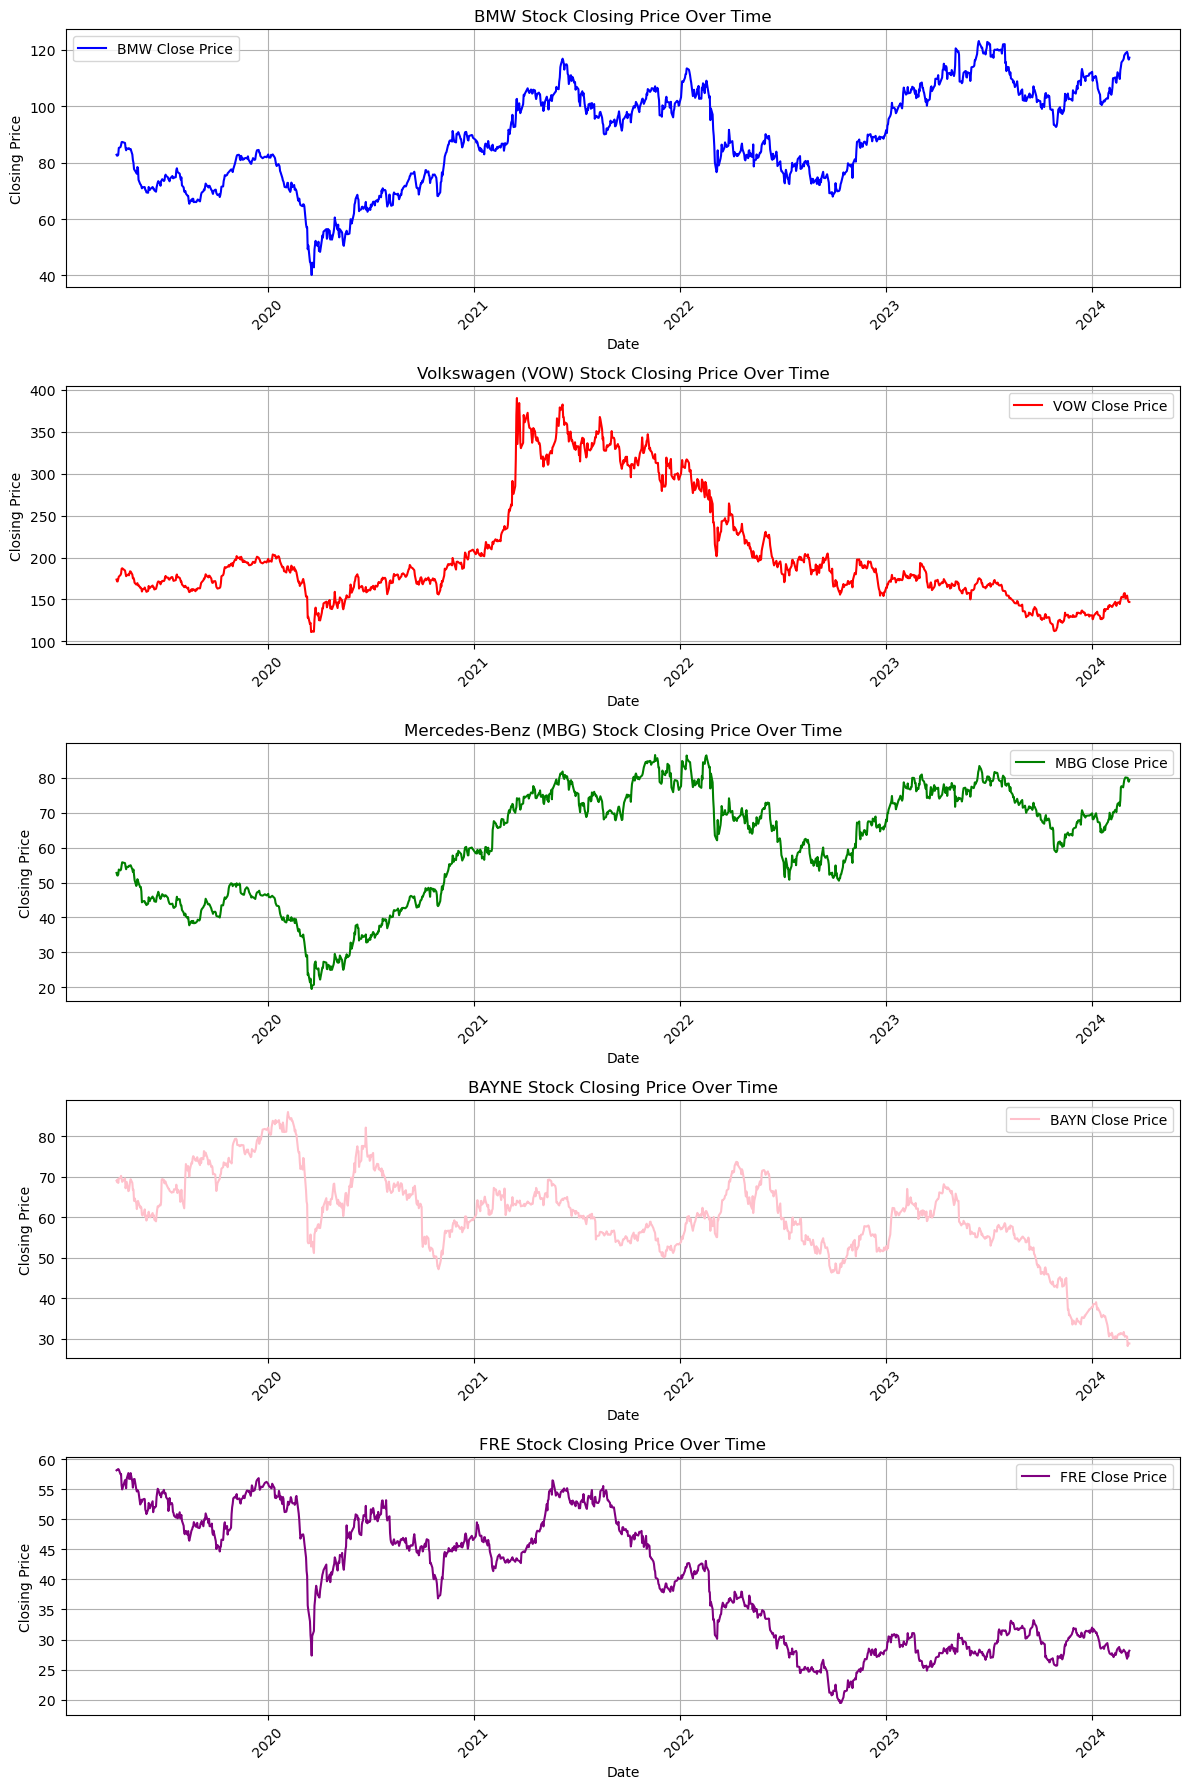

In [82]:
import matplotlib.pyplot as plt

# Create subplots: 3 rows, 1 column
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 18))

# BMW Stock Closing Price
axes[0].plot(bmw['Date'], bmw['Close'], linestyle='-', label='BMW Close Price', color='blue')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Closing Price')
axes[0].set_title('BMW Stock Closing Price Over Time')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Volkswagen (VOW) Stock Closing Price
axes[1].plot(vow['Date'], vow['Close'], linestyle='-', label='VOW Close Price', color='red')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Closing Price')
axes[1].set_title('Volkswagen (VOW) Stock Closing Price Over Time')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Mercedes-Benz (MBG) Stock Closing Price
axes[2].plot(mbg['Date'], mbg['Close'], linestyle='-', label='MBG Close Price', color='green')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Closing Price')
axes[2].set_title('Mercedes-Benz (MBG) Stock Closing Price Over Time')
axes[2].legend()
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True)

axes[3].plot(BAYN['Date'], BAYN['Close'], linestyle='-', label='BAYN Close Price', color='pink')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Closing Price')
axes[3].set_title('BAYNE Stock Closing Price Over Time')
axes[3].legend()
axes[3].tick_params(axis='x', rotation=45)
axes[3].grid(True)

axes[4].plot(FRE['Date'], FRE['Close'], linestyle='-', label='FRE Close Price', color='purple')
axes[4].set_xlabel('Date')
axes[4].set_ylabel('Closing Price')
axes[4].set_title('FRE Stock Closing Price Over Time')
axes[4].legend()
axes[4].tick_params(axis='x', rotation=45)
axes[4].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


### best arch model for the bmw stocks

/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'PACF plot for Closing Price in log format')

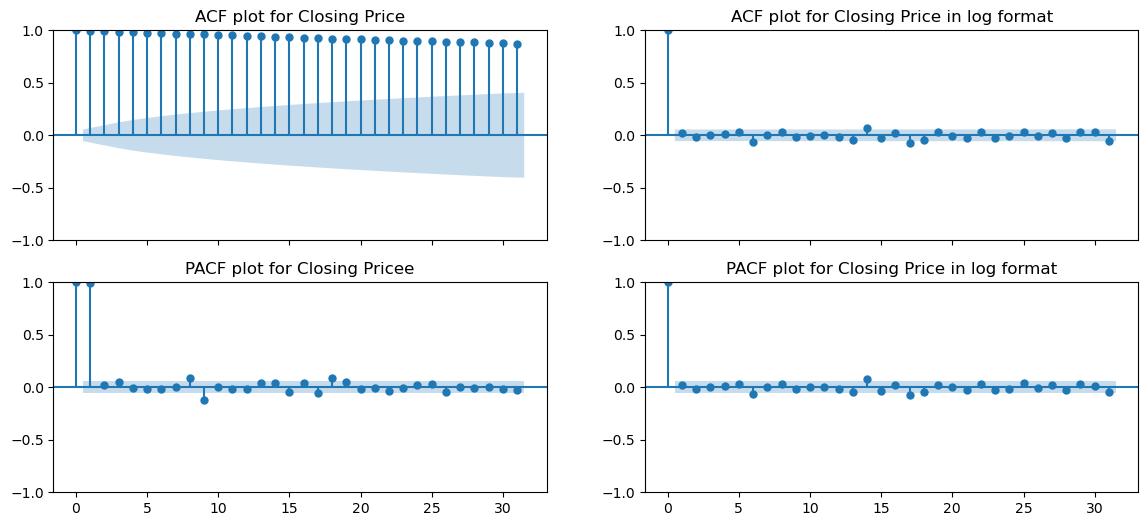

In [83]:
fig, axes=plt.subplots(2,2,figsize=(14,6),sharex=True)
plot_acf( portfolio_auto['Close'],ax=axes[0,0])
axes[0,0].set_title('ACF plot for Closing Price')
plot_pacf(portfolio_auto['Close'], ax=axes[1, 0])

axes[1,0].set_title('PACF plot for Closing Pricee')
plot_acf( portfolio_auto['log_returns'],ax=axes[0,1])
axes[0,1].set_title('ACF plot for Closing Price in log format')
plot_pacf(portfolio_auto['log_returns'], ax=axes[1, 1])

axes[1,1].set_title('PACF plot for Closing Price in log format')

In [14]:
BAYN= BAYN.set_index(BAYN['Date'])
UA= UA.set_index(UA['Date'])

In [15]:
auto_training= portfolio_auto[portfolio_auto.index<='2024-02-20']
auto_testing=portfolio_auto[portfolio_auto.index>='2024-02-20']
pharm_training= portfolio_pharm[portfolio_pharm.index<='2024-02-20']
pharm_testing=portfolio_pharm[portfolio_pharm.index>='2024-02-20']
BAYN_training=BAYN[BAYN.index <= '2021-07-20' ]
BAYN_testing=BAYN[BAYN.index >= '2021-07-20' ]
UA_training=UA[UA.index <= '2024-02-20' ]
UA_testing=UA[UA.index >= '2024-02-20' ]

In [ ]:
auto_training.index

### get the best combination for all type of timeseries prediction models before computing each model for auto


In [ ]:
# Step 1: Prepare your log returns
y = auto_training['log_returns'].dropna()

# Step 2: Fit ARIMA model to mean
arima_model = ARIMA(y, order=(2, 0, 1))  # You can tune this later
arima_results = arima_model.fit()
residuals = arima_results.resid

# Step 3: Fit GARCH model to ARIMA residuals
garch_model = arch_model(residuals, vol='GARCH', p=1, q=1)
garch_results = garch_model.fit(disp='off')

# Step 4: Forecast next period
arima_forecast = arima_results.forecast(steps=1)
garch_forecast = garch_results.forecast(horizon=1)

next_return = arima_forecast.iloc[0]
next_volatility = (garch_forecast.variance.iloc[-1]) ** 0.5

print("📈 Next predicted return:", next_return)
print("📉 Next predicted volatility (std dev):", next_volatility)

# Optional: Plot volatility
plt.figure(figsize=(10, 4))
plt.plot(garch_results.conditional_volatility)
plt.title("Estimated Conditional Volatility from GARCH")
plt.show()

In [ ]:
# Step 1: Define your y
y = auto_training['log_returns'].dropna()

# Step 2: Fit ARIMA model
arima_model = ARIMA(y, order=(1, 0, 1))  # or whatever order you prefer
arima_results = arima_model.fit()
residuals = arima_results.resid

# Step 3: Fit GARCH on ARIMA residuals
garch_model = arch_model(residuals, vol='Garch', p=1, q=1)
garch_results = garch_model.fit(disp='off')

# Step 4: Forecasting multiple steps
forecast_horizon = len(pd.date_range(start="2024-02-20", end="2024-03-09", freq='B'))

# ARIMA forecast for mean (returns)
arima_forecast = arima_results.forecast(steps=forecast_horizon)

# GARCH forecast for variance
garch_forecast = garch_results.forecast(horizon=forecast_horizon)

# Extract values
mean_returns = arima_forecast.values
volatility_forecast = garch_forecast.variance.values[-1]**0.5  # Last row, all steps

# Build forecast DataFrame
forecast_df = pd.DataFrame({
    'date': pd.date_range(start="2024-02-20", end="2024-03-09", freq='B'),
    'expected_return': mean_returns,
    'volatility': volatility_forecast
})
forecast_df.set_index('date', inplace=True)
forecast_df


In [ ]:
forecast_horizon

In [ ]:
forecast_df

In [21]:

auto_training.index = pd.to_datetime(auto_training.index)


In [ ]:
auto_training

### xgboost

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# Ensure datetime indexes
auto_training.index = pd.to_datetime(auto_training.index)
auto_testing.index = pd.to_datetime(auto_testing.index)

# Step 1: Combine both to create lag features across the boundary
combined = pd.concat([auto_training, auto_testing])

# Step 2: Create lag features (e.g., 5 lags)
for i in range(1, 6):
    combined[f'lag_{i}'] = combined['Close'].shift(i)

combined.dropna(inplace=True)

# Step 3: Split again using the original auto_training and auto_testing indexes
X = combined[[f'lag_{i}' for i in range(1, 6)]]
y = combined['Close']

# Match indices
X_train = X.loc[auto_training.index.intersection(X.index)]
y_train = y.loc[auto_training.index.intersection(y.index)]

X_test = X.loc[auto_testing.index.intersection(X.index)]
y_test = y.loc[auto_testing.index.intersection(y.index)]

# Step 4: Train the XGBoost model
model = XGBRegressor(n_estimators=200, max_depth=3, learning_rate=0.1)
model.fit(X_train, y_train)

# Step 5: Predict
preds = model.predict(X_test)

# Step 6: Plot results
plt.figure(figsize=(12, 10))
plt.plot(y_test.index, y_test, label='Actual', linestyle='-')
plt.plot(y_test.index, preds, label='XGBoost Prediction', linestyle='--',color='red')
plt.title('Log Returns Forecast with XGBoost')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.grid()
plt.show()



In [ ]:
pharm_training

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ensure datetime indexes
pharm_training.index = pd.to_datetime(pharm_training.index)
pharm_testing.index = pd.to_datetime(pharm_testing.index)

# Combine
df = pd.concat([pharm_training, pharm_testing])
df = df[['Close']].copy()

# Feature engineering
df['log_return'] = np.log(df['Close'] / df['Close'].shift(1))
df['rolling_mean_3'] = df['Close'].rolling(3).mean()
df['rolling_std_3'] = df['Close'].rolling(3).std()
df['momentum_3'] = df['Close'] - df['Close'].shift(3)

# Lag features
for i in range(1, 6):
    df[f'lag_{i}'] = df['Close'].shift(i)

# Shifted target — predict next day's Close
df['target'] = df['Close'].shift(-1)

# Drop NA rows
df.dropna(inplace=True)

# Define features
features = ['log_return', 'rolling_mean_3', 'rolling_std_3', 'momentum_3'] + [f'lag_{i}' for i in range(1, 6)]
X = df[features]
y = df['target']

# Split
X_train = X.loc[pharm_training.index.intersection(X.index)]
y_train = y.loc[pharm_training.index.intersection(y.index)]

X_test = X.loc[pharm_testing.index.intersection(X.index)]
y_test = y.loc[pharm_testing.index.intersection(y.index)]

# Model
model = XGBRegressor(n_estimators=200, max_depth=4, learning_rate=0.1)
model.fit(X_train, y_train)

# Predict
preds = model.predict(X_test)

# Results DataFrame
results = pd.DataFrame({
    'date': y_test.index,
    'actual_Close': y_test.values,
    'predicted_Close': preds
}).set_index('date')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(results.index, results['actual_Close'], label='Actual Close', linewidth=2)
plt.plot(results.index, results['predicted_Close'], label='Predicted Close', linestyle='--', color='red')
plt.title('Next-Day Close Forecast with Engineered Features')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Metrics
mae = mean_absolute_error(results['actual_Close'], results['predicted_Close'])
rmse = np.sqrt(mean_squared_error(results['actual_Close'], results['predicted_Close']))
r2 = r2_score(results['actual_Close'], results['predicted_Close'])

print("📊 XGBoost (with Engineered Features)")
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

# Ensure datetime indexes
BAYN_training.index = pd.to_datetime(BAYN_training.index)
BAYN_testing.index = pd.to_datetime(BAYN_testing.index)

# Combine data
df = pd.concat([BAYN_training, BAYN_testing])
df = df[['Close']].copy()

# Feature engineering
df['log_return'] = np.log(df['Close'] / df['Close'].shift(1))
df['rolling_mean_3'] = df['Close'].rolling(3).mean()
df['rolling_std_3'] = df['Close'].rolling(3).std()
df['momentum_3'] = df['Close'] - df['Close'].shift(3)
for i in range(1, 6):
    df[f'lag_{i}'] = df['Close'].shift(i)

# Target: next day's Close
df['target'] = df['Close'].shift(-1)
df.dropna(inplace=True)

# Define features
features = ['log_return', 'rolling_mean_3', 'rolling_std_3', 'momentum_3'] + [f'lag_{i}' for i in range(1, 6)]
X = df[features]
y = df['target']

# Optional: scale features (helps GridSearch consistency)
scaler = StandardScaler()
X[features] = scaler.fit_transform(X[features])

# Split
X_train = X.loc[BAYN_training.index.intersection(X.index)]
y_train = y.loc[BAYN_training.index.intersection(y.index)]
X_test = X.loc[BAYN_testing.index.intersection(X.index)]
y_test = y.loc[BAYN_testing.index.intersection(y.index)]

# Define model and param grid
xgb = XGBRegressor(random_state=42, verbosity=0)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid search with 3-fold cross-validation
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Fit
grid.fit(X_train, y_train)

# Best estimator and performance
print("✅ Best Parameters:")
print(grid.best_params_)

best_model = grid.best_estimator_

# Predict
preds = best_model.predict(X_test)

# Results & metrics
results = pd.DataFrame({
    'date': y_test.index,
    'actual_Close': y_test.values,
    'predicted_Close': preds
}).set_index('date')

mae = mean_absolute_error(results['actual_Close'], results['predicted_Close'])
rmse = np.sqrt(mean_squared_error(results['actual_Close'], results['predicted_Close']))
r2 = r2_score(results['actual_Close'], results['predicted_Close'])

print("\n📊 Tuned XGBoost Model Performance")
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Ensure datetime indexes
BAYN_training.index = pd.to_datetime(BAYN_training.index)
BAYN_testing.index = pd.to_datetime(BAYN_testing.index)

# Combine training and testing
df = pd.concat([BAYN_training, BAYN_testing])
df = df[['Close']].copy()

# Feature engineering
df['log_return'] = np.log(df['Close'] / df['Close'].shift(1))
df['rolling_mean_3'] = df['Close'].rolling(3).mean()
df['rolling_std_3'] = df['Close'].rolling(3).std()
df['momentum_3'] = df['Close'] - df['Close'].shift(3)
for i in range(1, 6):
    df[f'lag_{i}'] = df['Close'].shift(i)

# Target: next day's Close
df['target'] = df['Close'].shift(-1)
df.dropna(inplace=True)

# Features
features = ['log_return', 'rolling_mean_3', 'rolling_std_3', 'momentum_3'] + [f'lag_{i}' for i in range(1, 6)]
X = df[features]
y = df['target']

# Optional: scale features
scaler = StandardScaler()
X[features] = scaler.fit_transform(X[features])

# Train/test split
X_train = X.loc[BAYN_training.index.intersection(X.index)]
y_train = y.loc[BAYN_training.index.intersection(y.index)]
X_test = X.loc[BAYN_testing.index.intersection(X.index)]
y_test = y.loc[BAYN_testing.index.intersection(y.index)]

# Model with best parameters
model = XGBRegressor(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=1.0,
    random_state=42
)
model.fit(X_train, y_train)

# Predict
preds = model.predict(X_test)

# Results DataFrame
results = pd.DataFrame({
    'date': y_test.index,
    'actual_Close': y_test.values,
    'predicted_Close': preds
}).set_index('date')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(results.index, results['actual_Close'], label='Actual Close', linewidth=2)
plt.plot(results.index, results['predicted_Close'], label='Predicted Close (Tuned)', linestyle='--', color='red')
plt.title('BAYN: Tuned XGBoost Forecast with Engineered Features')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Metrics
mae = mean_absolute_error(results['actual_Close'], results['predicted_Close'])
rmse = np.sqrt(mean_squared_error(results['actual_Close'], results['predicted_Close']))
r2 = r2_score(results['actual_Close'], results['predicted_Close'])

print("📊 Tuned XGBoost Model Performance - BAYN")
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 1: Prepare the data
UA_training.index = pd.to_datetime(UA_training.index)
UA_testing.index = pd.to_datetime(UA_testing.index)

df = pd.concat([UA_training, UA_testing])
df = df[['Close']].copy()
df = df[~df.index.duplicated()]

# Normalize Close prices
scaler = MinMaxScaler()
df['scaled_Close'] = scaler.fit_transform(df[['Close']])

# Create LSTM sequences
lookback = 5

def create_sequences(data, lookback):
    X, y, dates = [], [], []
    for i in range(lookback, len(data)):
        X.append(data[i - lookback:i, 0])
        y.append(data[i, 0])
        dates.append(df.index[i])
    return np.array(X), np.array(y), dates

X_all, y_all, all_dates = create_sequences(df[['scaled_Close']].values, lookback)

# Step 2: Split train/test based on UA_training and UA_testing
cutoff = UA_training.index[-1]
train_mask = np.array(all_dates) <= cutoff
test_mask = np.array(all_dates) > cutoff

X_train, y_train = X_all[train_mask], y_all[train_mask]
X_test, y_test = X_all[test_mask], y_all[test_mask]
test_dates = np.array(all_dates)[test_mask]

# Reshape for LSTM: [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], lookback, 1))
X_test = X_test.reshape((X_test.shape[0], lookback, 1))

# Step 3: Build and train the LSTM model
model = Sequential([
    LSTM(50, input_shape=(lookback, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=0)

# Step 4: Make predictions and inverse scale
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 5: Create results DataFrame
UA_lstm_results = pd.DataFrame({
    'date': test_dates,
    'actual_Close': y_actual.flatten(),
    'predicted_Close': y_pred.flatten()
}).set_index('date')

# Step 6: Plot
plt.figure(figsize=(12, 6))
plt.plot(UA_lstm_results.index, UA_lstm_results['actual_Close'], label='Actual Close', linewidth=2)
plt.plot(UA_lstm_results.index, UA_lstm_results['predicted_Close'], label='LSTM Predicted Close', linestyle='--', color='red')
plt.title('UA LSTM Close Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 7: Evaluate
mae = mean_absolute_error(UA_lstm_results['actual_Close'], UA_lstm_results['predicted_Close'])
rmse = np.sqrt(mean_squared_error(UA_lstm_results['actual_Close'], UA_lstm_results['predicted_Close']))
r2 = r2_score(UA_lstm_results['actual_Close'], UA_lstm_results['predicted_Close'])

print("📊 UA LSTM Model Performance")
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Step 1: Prepare the data
dte_training.index = pd.to_datetime(dte_training.index)
dte_testing.index = pd.to_datetime(dte_testing.index)

df = pd.concat([dte_training, dte_testing])
df = df[['Close']].copy()
df = df[~df.index.duplicated()]

# Step 2: Feature engineering
df['log_return'] = np.log(df['Close'] / df['Close'].shift(1))
df['volatility'] = df['log_return'].rolling(5).std()
df['momentum'] = df['Close'] - df['Close'].shift(3)
df['target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
df.dropna(inplace=True)

# Normalize input features only
feature_scalers = {}
for col in ['log_return', 'volatility', 'momentum']:
    scaler = MinMaxScaler()
    df[f'scaled_{col}'] = scaler.fit_transform(df[[col]])
    feature_scalers[col] = scaler

# Define features & target
features = ['scaled_log_return', 'scaled_volatility', 'scaled_momentum']
lookback = 5

# Create sequences
def create_sequences(data, target_col, lookback):
    X, y, dates = [], [], []
    for i in range(lookback, len(data)):
        X.append(data[features].iloc[i - lookback:i].values)
        y.append(data[target_col].iloc[i])
        dates.append(data.index[i])
    return np.array(X), np.array(y), dates

X_all, y_all, all_dates = create_sequences(df, 'target', lookback)

# Split train/test
cutoff = dte_training.index[-1]
train_mask = np.array(all_dates) <= cutoff
test_mask = np.array(all_dates) > cutoff

X_train, y_train = X_all[train_mask], y_all[train_mask]
X_test, y_test = X_all[test_mask], y_all[test_mask]
test_dates = np.array(all_dates)[test_mask]

# Reshape
X_train = X_train.reshape((X_train.shape[0], lookback, len(features)))
X_test = X_test.reshape((X_test.shape[0], lookback, len(features)))

# Step 3: Build LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(lookback, len(features))),
    LSTM(32),
    Dense(1, activation='sigmoid')  # binary classification
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

# Step 4: Predict
y_pred_prob = model.predict(X_test)
y_pred_class = (y_pred_prob > 0.5).astype(int).flatten()

# Step 5: Evaluation
acc = accuracy_score(y_test, y_pred_class)
prec = precision_score(y_test, y_pred_class)
rec = recall_score(y_test, y_pred_class)

print("📊 DTE LSTM Classifier Performance (Up/Down)")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")

# Step 6: Plot direction vs actual
plt.figure(figsize=(12, 4))
plt.plot(test_dates, y_test, label='Actual Direction', marker='o')
plt.plot(test_dates, y_pred_class, label='Predicted Direction', linestyle='--', marker='x', color='red')
plt.title('DTE LSTM Up/Down Direction Prediction')
plt.xlabel('Date')
plt.ylabel('Direction (1=Up, 0=Down)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from xgboost import XGBRegressor
import numpy as np

# Ensure datetime index
pharm_training.index = pd.to_datetime(pharm_training.index)
pharm_testing.index = pd.to_datetime(pharm_testing.index)

# Combine training and testing data
df = pd.concat([pharm_training, pharm_testing])
df = df[['Close']].copy()
df = df[~df.index.duplicated(keep='first')]  # Just in case

# Create lag features
for i in range(1, 6):
    df[f'lag_{i}'] = df['Close'].shift(i)

df.dropna(inplace=True)

# Train model on full dataset
X = df[[f'lag_{i}' for i in range(1, 6)]]
y = df['Close']
model = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
model.fit(X, y)

# --- Predict known dates (rolling prediction) ---
predictions = []

for idx in range(5, len(df)):
    lagged = df.iloc[idx - 5:idx]['Close'].values[::-1]
    input_df = pd.DataFrame([lagged], columns=[f'lag_{i}' for i in range(1, 6)])
    pred = model.predict(input_df)[0]
    date = df.index[idx]
    predictions.append((date, pred))

rolling_pred_df = pd.DataFrame(predictions, columns=['date', 'predicted_Close']).set_index('date')
rolling_pred_df['actual_Close'] = df['Close'].loc[rolling_pred_df.index]

# --- Forecast future dates ---
future_steps = 20
last_known = df.iloc[-5:].copy()
future_preds = []
current_lags = last_known['Close'].values[::-1].tolist()

for i in range(future_steps):
    input_df = pd.DataFrame([current_lags], columns=[f'lag_{i}' for i in range(1, 6)])
    pred = model.predict(input_df)[0]
    next_date = df.index[-1] + pd.Timedelta(days=i + 1)
    future_preds.append((next_date, pred))
    current_lags = [pred] + current_lags[:-1]

future_df = pd.DataFrame(future_preds, columns=['date', 'predicted_Close']).set_index('date')
future_df['actual_Close'] = np.nan

# --- Final combined DataFrame ---
pharm_full_results = pd.concat([rolling_pred_df, future_df])

# Preview
print("✅ Full prediction DataFrame for pharma stock:")
display(pharm_full_results.head())


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Plot actual Close (historical only)
plt.plot(rolling_pred_df.index, rolling_pred_df['actual_Close'], label='Actual Close', color='blue', linewidth=2)

# Plot predicted Close (historical)
plt.plot(rolling_pred_df.index, rolling_pred_df['predicted_Close'], label='Predicted Close (In-sample)', color='orange', linestyle='--')

# Plot predicted Close (future)
plt.plot(future_df.index, future_df['predicted_Close'], label='Predicted Close (Future)', color='green', linestyle='--')

# Styling
plt.title('XGBoost: Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# Ensure datetime indexes
auto_training.index = pd.to_datetime(auto_training.index)
auto_testing.index = pd.to_datetime(auto_testing.index)

# Step 1: Combine both to create lag features across the boundary
combined = pd.concat([auto_training, auto_testing])

# Step 2: Create lag features (e.g., 5 lags)
for i in range(1, 6):
    combined[f'lag_{i}'] = combined['Close'].shift(i)

combined.dropna(inplace=True)

# Step 3: Split again using the original auto_training and auto_testing indexes
X = combined[[f'lag_{i}' for i in range(1, 6)]]
y = combined['Close']

# Match indices
X_train = X.loc[auto_training.index.intersection(X.index)]
y_train = y.loc[auto_training.index.intersection(y.index)]

X_test = X.loc[auto_testing.index.intersection(X.index)]
y_test = y.loc[auto_testing.index.intersection(y.index)]

# Step 4: Train the XGBoost model
model = XGBRegressor(n_estimators=200, max_depth=3, learning_rate=0.1)
model.fit(X_train, y_train)

# Step 5: Predict
preds = model.predict(X_test)

# Step 6: Plot results
plt.figure(figsize=(12, 10))
plt.plot(y_test.index, y_test, label='Actual', linestyle='-')
plt.plot(y_test.index, preds, label='XGBoost Prediction', linestyle='--',color='red')
plt.title('Log Returns Forecast with XGBoost')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.grid()
plt.show()


### metrics

In [ ]:
# Step 7: Build result DataFrame
xgb_results = pd.DataFrame({
    'date': y_test.index,
    'actual_close': y_test.values,
    'predicted_close': preds
}).set_index('date')

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Extract actual and predicted
y_true = xgb_results['actual_close']
y_pred = xgb_results['predicted_close']

# Compute metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

# Display
print("📊 XGBoost Test-Only Model Performance")
print(f"MAE  (Mean Absolute Error):     {mae:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f"R² Score:                       {r2:.4f}")


### Rolling XGBoost Forecast Code (walk-forward)



In [ ]:
import pandas as pd
from xgboost import XGBRegressor
import numpy as np

# Prep
auto_training.index = pd.to_datetime(auto_training.index)
auto_testing.index = pd.to_datetime(auto_testing.index)
df = pd.concat([auto_training, auto_testing])
df = df[['Close']].copy()

# Remove duplicates (just in case)
df = df[~df.index.duplicated(keep='first')]

# Create lags
for i in range(1, 6):
    df[f'lag_{i}'] = df['Close'].shift(i)

df.dropna(inplace=True)

# Train model
X = df[[f'lag_{i}' for i in range(1, 6)]]
y = df['Close']

model = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
model.fit(X, y)

# --- Part 1: Predict known dates ---
predictions = []

for idx in range(5, len(df)):
    lagged = df.iloc[idx - 5:idx]['Close'].values[::-1]
    input_df = pd.DataFrame([lagged], columns=[f'lag_{i}' for i in range(1, 6)])
    pred = model.predict(input_df)[0]
    date = df.index[idx]
    predictions.append((date, pred))

rolling_pred_df = pd.DataFrame(predictions, columns=['date', 'predicted_Close']).set_index('date')
rolling_pred_df['actual_Close'] = df['Close'].loc[rolling_pred_df.index]

# --- Part 2: Predict N future days ---
future_steps = 20 # or 20, etc.
last_known = df.iloc[-5:].copy()

future_preds = []
current_lags = last_known['Close'].values[::-1].tolist()

for i in range(future_steps):
    input_df = pd.DataFrame([current_lags], columns=[f'lag_{i}' for i in range(1, 6)])
    pred = model.predict(input_df)[0]
    next_date = df.index[-1] + pd.Timedelta(days=i+1)
    
    future_preds.append((next_date, pred))
    
    # Update lags with latest prediction
    current_lags = [pred] + current_lags[:-1]

future_df = pd.DataFrame(future_preds, columns=['date', 'predicted_Close']).set_index('date')

# Combine known + future predictions
all_preds_df = pd.concat([rolling_pred_df, future_df])

# Preview
all_preds_df.head(), all_preds_df.tail()


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Plot actual Close (historical only)
plt.plot(rolling_pred_df.index, rolling_pred_df['actual_Close'], label='Actual Close', color='blue', linewidth=2)

# Plot predicted Close (historical)
plt.plot(rolling_pred_df.index, rolling_pred_df['predicted_Close'], label='Predicted Close (In-sample)', color='orange', linestyle='--')

# Plot predicted Close (future)
plt.plot(future_df.index, future_df['predicted_Close'], label='Predicted Close (Future)', color='green', linestyle='--')

# Styling
plt.title('XGBoost: Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### metrics for model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Extract actual and predicted from in-sample results
y_true = rolling_pred_df['actual_Close']
y_pred = rolling_pred_df['predicted_Close']

# Compute metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

# Display results
print(f"📊 XGBoost Model Performance:  MAE:{mae} \n rmse:{rmse} \n r2:{r2}")


In [ ]:
import warnings
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ensure datetime index
auto_training.index = pd.to_datetime(auto_training.index)
y_train = auto_training['log_returns']

# Define parameter ranges
p = d = q = range(0, 3)         # Non-seasonal
P = D = Q = range(0, 2)         # Seasonal
s = [7]                         # Weekly seasonality for daily data

# Create parameter grid
import itertools
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q, s))

# To store results
results = []
best_aic = np.inf
best_params = None

# Silence convergence warnings
warnings.filterwarnings("ignore")

# Grid search loop
for order in pdq:
    for seasonal_order in seasonal_pdq:
        try:
            model = SARIMAX(
                y_train,
                order=order,
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            res = model.fit(disp=False)
            results.append((order, seasonal_order, res.aic))

            if res.aic < best_aic:
                best_aic = res.aic
                best_params = (order, seasonal_order)

        except:
            continue

# Sort and print top 5
sorted_results = sorted(results, key=lambda x: x[2])
print("🔍 Top 5 parameter combinations (by AIC):")
for i in range(min(5, len(sorted_results))):
    print(f"{i+1}. Order: {sorted_results[i][0]}, Seasonal: {sorted_results[i][1]}, AIC: {sorted_results[i][2]:.2f}")

print("\n✅ Best model found:")
print(f"Order: {best_params[0]}")
print(f"Seasonal Order: {best_params[1]}")
print(f"AIC: {best_aic:.2f}")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ensure datetime index
auto_training.index = pd.to_datetime(auto_training.index)
auto_testing.index = pd.to_datetime(auto_testing.index)

# Step 1: Define y_train and y_test
y_train = auto_training['log_returns']
y_test = auto_testing['log_returns']

# Step 2: Fit SARIMAX model
# You can tune (p, d, q) and (P, D, Q, s) as needed
model = SARIMAX(
    y_train,
    order=(0, 0, 2),             # ARIMA part: (p, d, q)
    seasonal_order=(0, 1, 1, 7), # Weekly seasonality for daily data
    enforce_stationarity=False,
    enforce_invertibility=False
)
results = model.fit(disp=False)

# Step 3: Forecast the same number of steps as auto_testing
n_test = len(auto_testing)
forecast = results.get_forecast(steps=n_test)

# Step 4: Extract predicted values + confidence intervals
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Match forecast index to auto_testing
predicted_mean.index = auto_testing.index
conf_int.index = auto_testing.index

# Step 5: Plot results
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', linestyle='-')
plt.plot(predicted_mean.index, predicted_mean, label='SARIMAX Prediction', linestyle='--')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='orange', alpha=0.2, label='95% CI')
plt.title('Log Returns Forecast with SARIMAX')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.grid()
plt.show()
